<a href="https://colab.research.google.com/github/Vedanta77/Analysing-Loan-Defaults-through-ML-Alogorithms/blob/main/largedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Loan_default.csv')
df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.shape

(255347, 18)

In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.shape

(255347, 18)

In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df.duplicated().sum()

np.int64(0)

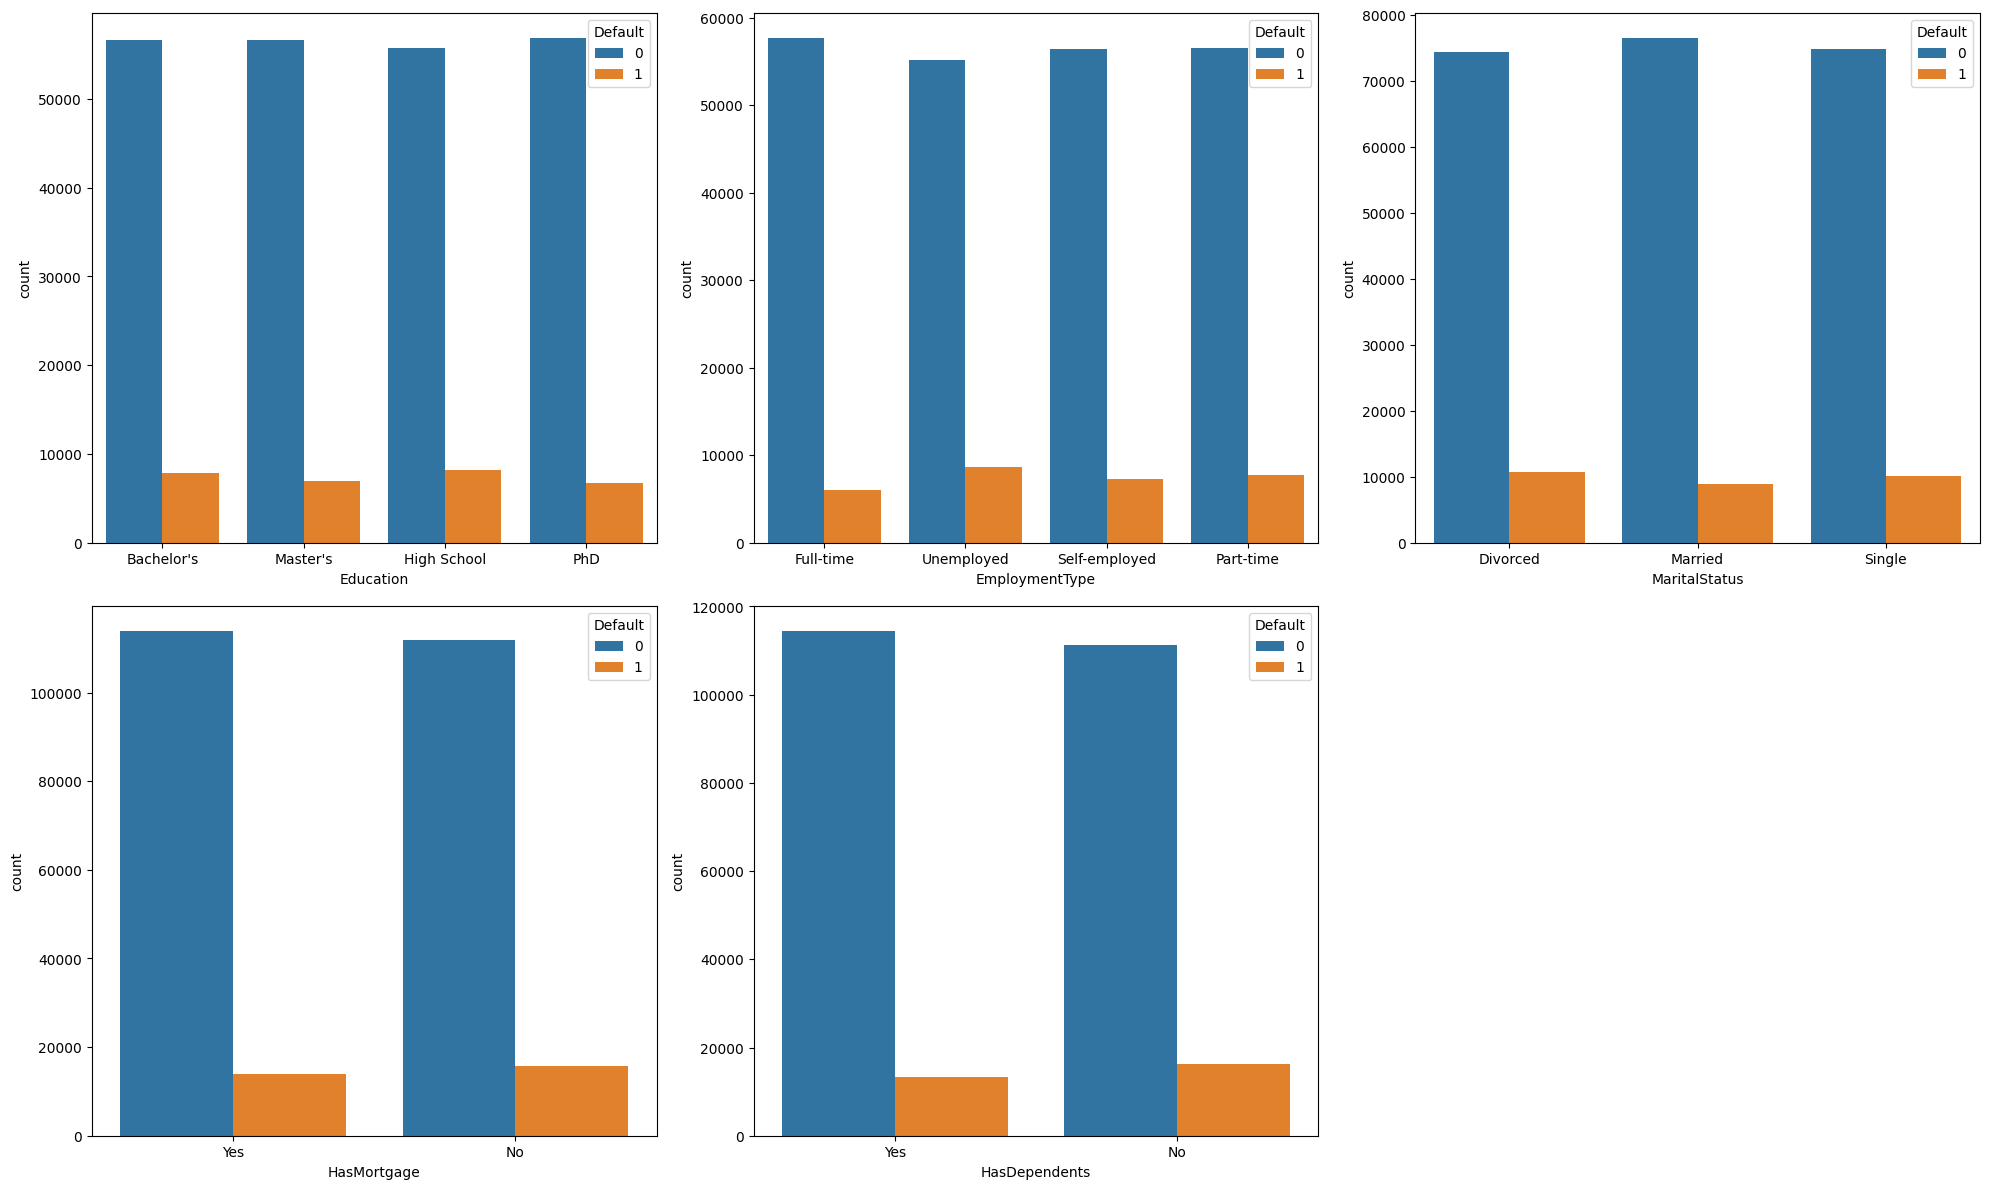

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(231)
sns.countplot(x='Education', hue='Default',data=df)
plt.subplot(232)
sns.countplot(x='EmploymentType', hue='Default',data=df)
plt.subplot(233)
sns.countplot(x='MaritalStatus', hue='Default',data=df)
plt.subplot(234)
sns.countplot(x='HasMortgage', hue='Default',data=df)
plt.subplot(235)
sns.countplot(x='HasDependents', hue='Default',data=df)

plt.tight_layout()
plt.show()

In [ ]:
df['Default'].value_counts()

,count
Default,
0,225694
1,29653


In [ ]:
df.MaritalStatus = df.MaritalStatus.map({'Single':0,'Married':1,'Divorced':2})
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
1,85302
2,85033
0,85012


In [ ]:
df['Education'] = df['Education'].replace({
    "Master's": "M",
    "Bachelor's": "B",
    "High School": "HS"
})


In [ ]:
df.Education = df.Education.map({'PhD':3,'B':1,'M':2,'HS':0})
df['Education'].value_counts()

,count
Education,
1,64366
0,63903
2,63541
3,63537


In [ ]:
df['EmploymentType'] = df['EmploymentType'].replace({
    "Full-time": "FT",
    "Part-time": "PT",
    "Self-employed": "SE",
    "Unemployed": "UE"
})

In [ ]:
df.EmploymentType = df.EmploymentType.map({'FT':0,'PT':1,'SE':2,'UE':3})
df['EmploymentType'].value_counts()

,count
EmploymentType,
1,64161
3,63824
2,63706
0,63656


In [ ]:
df.HasMortgage = df.HasMortgage.map({'Yes':1,'No':0})
df['HasMortgage'].value_counts()

,count
HasMortgage,
1,127677
0,127670


In [ ]:
df.HasDependents = df.HasDependents.map({'Yes':1,'No':0})
df['HasDependents'].value_counts()

,count
HasDependents,
1,127742
0,127605


In [ ]:
df.LoanPurpose= df.LoanPurpose.map({'Auto':0,'Other':1,'Education': 2, 'Home':3,'Business':4})
df['LoanPurpose'].value_counts()

,count
LoanPurpose,
4,51298
3,51286
2,51005
1,50914
0,50844


In [ ]:
df.HasCoSigner = df.HasCoSigner.map({'Yes':1,'No':0})
df['HasCoSigner'].value_counts()

,count
HasCoSigner,
1,127701
0,127646


In [ ]:
df['CreditScore'].value_counts()

,count
CreditScore,
630,528
445,521
829,520
753,519
670,515
...,...
629,408
536,406
706,406


In [ ]:
df['NumCreditLines'].value_counts()

,count
NumCreditLines,
2,64130
3,63834
4,63829
1,63554


In [ ]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,1,0,2,1,1,1,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,1,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,2,3,2,1,1,0,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,0,0,1,0,0,4,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,1,3,2,0,1,0,0,0


# **LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [ ]:

# ------------------------------
# 1. Prepare X and y
# ------------------------------

# Drop LoanID from features
data = df.drop(columns=["LoanID"], errors="ignore")

# X = all columns except Default
X = data.drop(columns=["Default"]).values

# y = Default column
y = data["Default"].values

# ------------------------------
# 2. Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# ------------------------------
# 3. Logistic Regression model
# ------------------------------
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# ------------------------------
# 4. Predictions
# ------------------------------
lr_prediction = model.predict(X_test)

# ------------------------------
# 5. Accuracy
# ------------------------------
print("Logistic Regression accuracy =",
      metrics.accuracy_score(lr_prediction, y_test))

# ------------------------------
# 6. Print predictions (your preferred style)
# ------------------------------
print("y_predicted", lr_prediction)
print("y_test", y_test)


Logistic Regression accuracy = 0.884367861105672
y_predicted [0 0 0 ... 0 0 0]
y_test [0 0 0 ... 0 0 0]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. feature names = all columns used in X
feature_names = data.drop(columns=['Default']).columns

# 2. coefficients from logistic regression
coefficients = model.coef_[0]      # 1 row for binary classification

# sanity check
print(len(feature_names), len(coefficients))

# 3. build importance table
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute_Importance": np.abs(coefficients)
})

importance_df = importance_df.sort_values(by="Absolute_Importance",
                                          ascending=False)

print(importance_df)


16 16
           Feature  Coefficient  Absolute_Importance
6     InterestRate     0.065120             0.065120
0              Age    -0.042898             0.042898
10  EmploymentType     0.011803             0.011803
4   MonthsEmployed    -0.009869             0.009869
9        Education    -0.008911             0.008911
5   NumCreditLines     0.007179             0.007179
15     HasCoSigner    -0.005468             0.005468
13   HasDependents    -0.004950             0.004950
12     HasMortgage    -0.003234             0.003234
14     LoanPurpose    -0.002566             0.002566
11   MaritalStatus     0.001561             0.001561
3      CreditScore    -0.000992             0.000992
8         DTIRatio     0.000932             0.000932
7         LoanTerm     0.000220             0.000220
1           Income    -0.000009             0.000009
2       LoanAmount     0.000004             0.000004


AUC Score: 0.7367923569446919


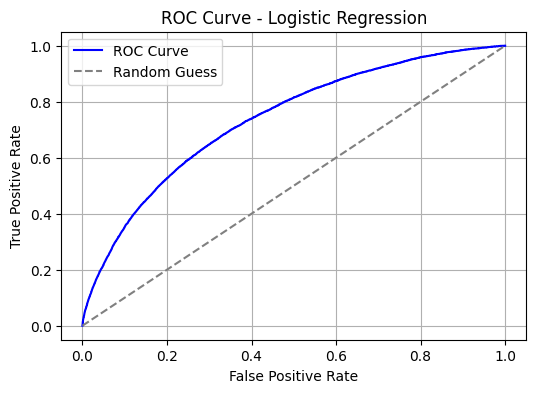

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get probability scores from logistic regression
y_prob = model.predict_proba(X_test)[:, 1]

# AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# -------------------------------
# Random Forest Model
# -------------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=0
)
rf_model.fit(X_train, y_train)

# -------------------------------
# Predictions
# -------------------------------
rf_prediction = rf_model.predict(X_test)

# -------------------------------
# Accuracy (same style as LR)
# -------------------------------
print("Random Forest accuracy =", metrics.accuracy_score(rf_prediction, y_test))

# prediction print (your style)
print("y_predicted", rf_prediction)
print("y_test", y_test)


Random Forest accuracy = 0.885816852685856
y_predicted [0 0 0 ... 0 0 0]
y_test [1 0 0 ... 0 0 0]


AUC Score: 0.7279696164718228


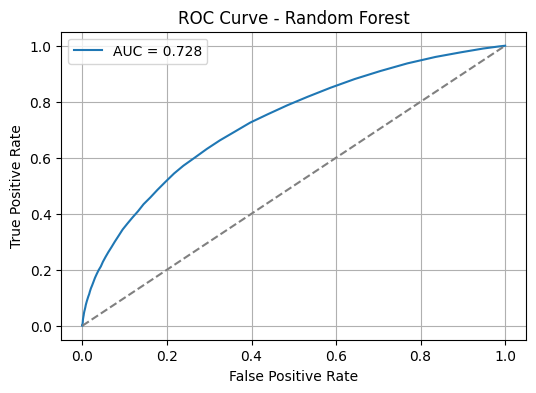

In [ ]:
# AUC Score
# -------------------------------
rf_prob = rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, rf_prob)
print("AUC Score:", auc_score)

# -------------------------------
# ROC Curve
# -------------------------------
fpr, tpr, thresholds = roc_curve(y_test, rf_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics

# ----------------------------------------------------
# 1. Train XGBoost (NO SMOTE)
# ----------------------------------------------------
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=0
)

xgb_model.fit(X_train, y_train)

# ----------------------------------------------------
# 2. Predictions
# ----------------------------------------------------
xgb_pred = xgb_model.predict(X_test)

# ----------------------------------------------------
# 3. Accuracy
# ----------------------------------------------------
print("XGBoost accuracy =", metrics.accuracy_score(xgb_pred, y_test))

print("y_predicted", xgb_pred)
print("y_test", y_test)


XGBoost accuracy = 0.8863129038574505
y_predicted [0 0 0 ... 0 0 0]
y_test [1 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("\nPrecision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))

print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))



Precision: 0.5985247629083246
Recall: 0.06384892086330936
F1 Score: 0.11538852209243271

Confusion Matrix:
[[67328   381]
 [ 8328   568]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.60      0.06      0.12      8896

    accuracy                           0.89     76605
   macro avg       0.74      0.53      0.53     76605
weighted avg       0.86      0.89      0.84     76605



XGBoost AUC Score: 0.7551807248613964


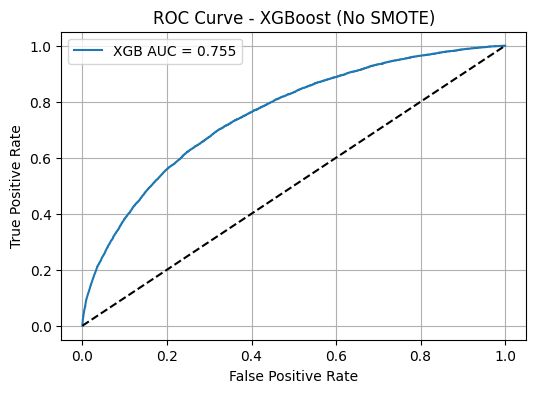

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_prob)
print("XGBoost AUC Score:", xgb_auc)

fpr, tpr, thresholds = roc_curve(y_test, xgb_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"XGB AUC = {xgb_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (No SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


# **SMOTE**

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
import numpy as np


In [ ]:

# Prepare X and y

data = df.drop(columns=['LoanID'], errors='ignore')
X = data.drop(columns=['Default']).values
y = data['Default'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print("Original class counts in y_train:", np.bincount(y_train))


# Apply SMOTE oversampling ONLY on training data

smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Resampled class counts in y_train_res:", np.bincount(y_train_res))


Original class counts in y_train: [157985  20757]
Resampled class counts in y_train_res: [157985 157985]


# **LR WITH SMOTE**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# -----------------------------
# Logistic Regression (SMOTE data)
# -----------------------------
model = LogisticRegression(max_iter=500)
model.fit(X_train_res, y_train_res)

# Predictions
lr_prediction = model.predict(X_test)

# Accuracy
print("Logistic Regression accuracy =",
      metrics.accuracy_score(lr_prediction, y_test))

print("y_predicted", lr_prediction)
print("y_test", y_test)


Logistic Regression accuracy = 0.6747209712159781
y_predicted [1 1 0 ... 1 0 0]
y_test [1 0 0 ... 0 0 0]


LR AUC Score: 0.7370848034240053


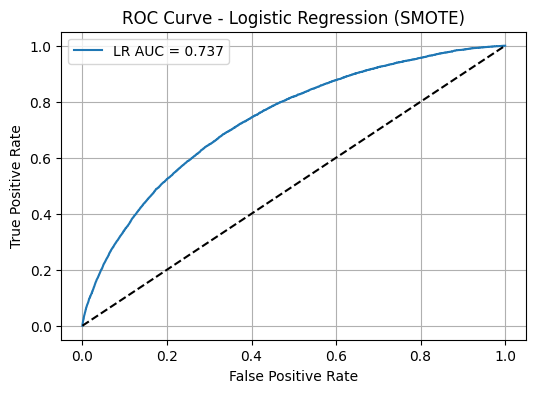

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("LR AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"LR AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# -----------------------------
# FULL METRICS FOR LOGISTIC REGRESSION
# -----------------------------

# Precision
precision = precision_score(y_test, lr_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, lr_prediction)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, lr_prediction)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, lr_prediction)
print("\nConfusion Matrix:\n", cm)

# Classification Report (everything together)
print("\nClassification Report:\n")
print(classification_report(y_test, lr_prediction))


Precision: 0.2142398516087608
Recall: 0.6751348920863309
F1 Score: 0.32526401299756297

Confusion Matrix:
 [[45681 22028]
 [ 2890  6006]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.67      0.79     67709
           1       0.21      0.68      0.33      8896

    accuracy                           0.67     76605
   macro avg       0.58      0.67      0.56     76605
weighted avg       0.86      0.67      0.73     76605



# **RANDOM FOREST WITH SMOTE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# Random Forest (SMOTE data)
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=0
)
rf_model.fit(X_train_res, y_train_res)

rf_prediction = rf_model.predict(X_test)

print("Random Forest accuracy =",
      metrics.accuracy_score(rf_prediction, y_test))

print("y_predicted", rf_prediction)
print("y_test", y_test)


Random Forest accuracy = 0.9654722276613799
y_predicted [0 0 0 ... 0 0 0]
y_test [0 0 0 ... 0 0 0]


RF AUC Score: 0.9603742881631684


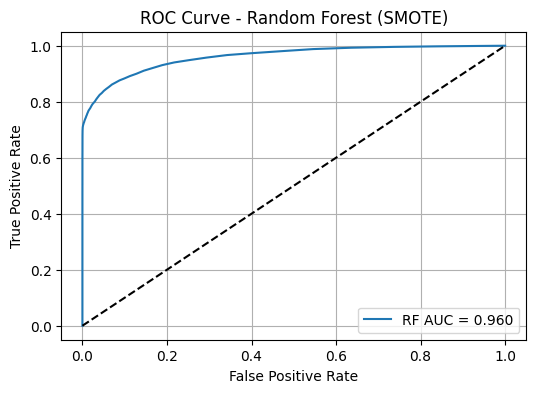

In [ ]:
rf_prob = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_prob)
print("RF AUC Score:", rf_auc)

fpr, tpr, thresholds = roc_curve(y_test, rf_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"RF AUC = {rf_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Precision, Recall, F1 for class "1" (default)
print("Precision:", precision_score(y_test, rf_prediction))
print("Recall:", recall_score(y_test, rf_prediction))
print("F1 Score:", f1_score(y_test, rf_prediction))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_prediction))

# Full Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, rf_prediction))


Precision: 0.9857827229176325
Recall: 0.7141737572772056
F1 Score: 0.82828020515484

Confusion Matrix:
[[67581    92]
 [ 2553  6379]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     67673
           1       0.99      0.71      0.83      8932

    accuracy                           0.97     76605
   macro avg       0.97      0.86      0.90     76605
weighted avg       0.97      0.97      0.96     76605



# **XGBOOST WITH SMOTE**

XGBoost accuracy = 0.8857646367730566
y_predicted [0 0 0 ... 0 0 0]
y_test [1 0 0 ... 0 0 0]

Precision: 0.5689819219790676
Recall: 0.06722122302158273
F1 Score: 0.12023725746456218

Confusion Matrix:
 [[67256   453]
 [ 8298   598]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.57      0.07      0.12      8896

    accuracy                           0.89     76605
   macro avg       0.73      0.53      0.53     76605
weighted avg       0.85      0.89      0.84     76605


XGBoost AUC Score: 0.7512717152040084


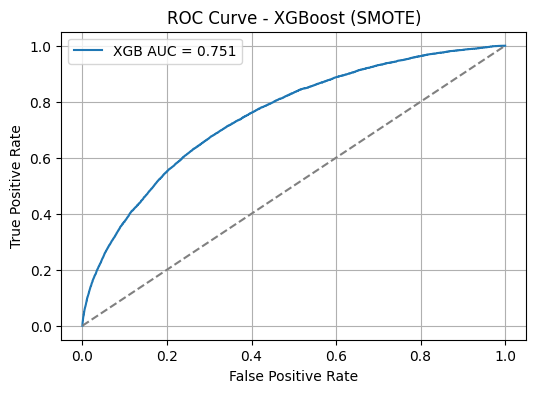

In [ ]:
# XGBoost with SMOTE - run after you have df loaded/cleaned
# (installs if needed)
# !pip install xgboost imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# assuming df is already loaded & cleaned and 'LoanID' + 'Default' exist
data = df.drop(columns=['LoanID'], errors='ignore')
X = data.drop(columns=['Default']).values
y = data['Default'].values

# -----------------------
# 2) train-test split (stratify to keep class ratio in test)
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)



# -----------------------
# 3) XGBoost model
# -----------------------
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=0
)

xgb.fit(X_train_res, y_train_res)

# -----------------------
# 4) Predictions & basic metrics
# -----------------------
xgb_pred = xgb.predict(X_test)
print("XGBoost accuracy =", metrics.accuracy_score(y_test, xgb_pred))
print("y_predicted", xgb_pred)
print("y_test", y_test)

# Precision / Recall / F1 / Confusion matrix / Report
print("\nPrecision:", metrics.precision_score(y_test, xgb_pred))
print("Recall:", metrics.recall_score(y_test, xgb_pred))
print("F1 Score:", metrics.f1_score(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

# -----------------------
# 5) AUC + ROC curve
# -----------------------
xgb_prob = xgb.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_prob)
print("\nXGBoost AUC Score:", xgb_auc)

fpr, tpr, thresholds = roc_curve(y_test, xgb_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"XGB AUC = {xgb_auc:.3f}")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


